In [1]:
import pandas as pd
import numpy as np
import random

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.__version__

'2.2.2'

# The python date time module

In [3]:
from datetime import date, time, datetime

In [4]:
date_A = date(2024,6,21)

In [5]:
date_A

datetime.date(2024, 6, 21)

In [6]:
type(date_A)

datetime.date

In [7]:
date_A.day

21

In [8]:
date_A.month

6

In [9]:
date_A.day

21

In [10]:
# the time class

In [11]:
time_A = time(4,30,12,34321)

In [12]:
time_A

datetime.time(4, 30, 12, 34321)

In [13]:
type(time_A)

datetime.time

In [14]:
time_B = time(6)

In [15]:
time_B

datetime.time(6, 0)

In [16]:
time_A.hour

4

In [17]:
time_A.minute

30

In [18]:
time_A.second

12

In [19]:
time_A.isoformat()

'04:30:12.034321'

In [20]:
# the datetime class

In [21]:
dt_A = datetime(2020, 4, 25, 19, 1, 23, 213132)

In [22]:
dt_A

datetime.datetime(2020, 4, 25, 19, 1, 23, 213132)

In [23]:
datetime.now()

datetime.datetime(2024, 6, 24, 12, 6, 3, 619876)

In [24]:
dt_A.year

2020

In [25]:
dt_A.microsecond

213132

In [26]:
print(dt_A)

2020-04-25 19:01:23.213132


# Parsing dates from text

In [27]:
dt_B = datetime.strptime('2024-06-22', '%Y-%m-%d')

In [28]:
dt_B.isoformat()

'2024-06-22T00:00:00'

In [29]:
dt_B.year

2024

In [30]:
try_this = "jan 20 2090 6pm"

In [31]:
new_date = datetime.strptime(try_this, "%b %d %Y %I%p")

In [32]:
new_date.isoformat()

'2090-01-20T18:00:00'

In [33]:
print(new_date)

2090-01-20 18:00:00


# Even better: dateutil

In [34]:
!pip show python-dateutil

Name: python-dateutil
Version: 2.8.2
Summary: Extensions to the standard Python datetime module
Home-page: https://github.com/dateutil/dateutil
Author: Gustavo Niemeyer
Author-email: gustavo@niemeyer.net
License: Dual License
Location: C:\Users\hp\anaconda3\Lib\site-packages
Requires: six
Required-by: anaconda-client, arrow, botocore, conda-repo-cli, datashape, jupyter_client, matplotlib, pandas


In [35]:
from dateutil import parser

In [36]:
parser.parse("jan 21st 1910")

datetime.datetime(1910, 1, 21, 0, 0)

In [37]:
parser.parse("22 april 2068 at 4pm and 17minutes 20 seconds")

datetime.datetime(2068, 4, 22, 16, 17, 20)

# From datetime to string

In [38]:
# the strftime()

In [39]:
dt = datetime.now()

In [40]:
dt

datetime.datetime(2024, 6, 24, 12, 6, 7, 645807)

In [41]:
dt.strftime('%Y')

'2024'

In [42]:
dt.strftime('Year: %Y; Month: %m; Day: %d')

'Year: 2024; Month: 06; Day: 24'

In [43]:
dt.strftime('%c')

'Mon Jun 24 12:06:07 2024'

In [44]:
# An alternative approach

In [45]:
"My date is {:%c}"

'My date is {:%c}'

In [46]:
"My date is {:%c}".format(dt)

'My date is Mon Jun 24 12:06:07 2024'

# Performant datetimes with numpy

In [47]:
a = np.datetime64('2024-06-21')  # it has the date as the time unit thats why if we add 10 to it then 10 more day will be added

In [48]:
b = np.datetime64(datetime.now())  # it has the microsecond as the time unit thats why if we add 10 to it then it will remain almost same

In [49]:
a

numpy.datetime64('2024-06-21')

In [50]:
a+10

numpy.datetime64('2024-07-01')

In [51]:
b

numpy.datetime64('2024-06-24T12:06:07.720206')

In [52]:
b+10

numpy.datetime64('2024-06-24T12:06:07.720216')

In [53]:
np.datetime64(b, 'D') + 10

numpy.datetime64('2024-07-04')

In [54]:
# vectorized opps

In [55]:
dates = np.array([
    '2019-02-20',
    '2019-06-20',
    '2019-03-23'
], dtype = np.datetime64)

In [56]:
dates-10

array(['2019-02-10', '2019-06-10', '2019-03-13'], dtype='datetime64[D]')

In [57]:
# ...what about business days

In [58]:
np.busday_offset(dates, offsets = 10, roll = "backward")

array(['2019-03-06', '2019-07-04', '2019-04-05'], dtype='datetime64[D]')

# The pandas Timestamp()

In [59]:
# pandas Timestamp = python datetime + numpy datetime64

In [60]:
"4th of July 1776"

'4th of July 1776'

In [61]:
pd.Timestamp("4th of July 1776")

Timestamp('1776-07-04 00:00:00')

In [62]:
pd.Timestamp('4/7/1776')

Timestamp('1776-04-07 00:00:00')

In [63]:
pdts = pd.to_datetime('4/7/1776', dayfirst=True)

In [64]:
pdts.day_name()

'Thursday'

In [65]:
pdts.days_in_month

31

In [66]:
pdts.quarter

3

In [67]:
pdts.isocalendar()

datetime.IsoCalendarDate(year=1776, week=27, weekday=4)

# Our dataset: Brent Prices

In [68]:
brent = pd.read_csv("D:/STUDIES/Numpy & Pandas/pandas/all_notebooks/10. Handling_Time_And_Date.ipynb/BrentOilPrices.csv")

In [69]:
brent.head()

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77


In [70]:
brent.shape

(5016, 2)

In [71]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 362.6 KB


# Date parsing and DateTimeIndex

In [72]:
brent.head()

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77


In [73]:
brent.dtypes

Date      object
Price    float64
dtype: object

In [74]:
brent['Date'] = brent['Date'].astype('datetime64[ns]')

In [75]:
brent.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [76]:
brent.head()

,Date,Price
0,2000-01-04,23.95
1,2000-01-05,23.72
2,2000-01-06,23.55
3,2000-01-07,23.35
4,2000-01-10,22.77


In [77]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5016 non-null   datetime64[ns]
 1   Price   5016 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.5 KB


In [78]:
brent.set_index('Date', inplace=True)

In [79]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [80]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

# A cool shortcut: read_csv with parse_dates

In [81]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [82]:
brent2 = pd.read_csv("D:/STUDIES/Numpy & Pandas/pandas/all_notebooks/10. Handling_Time_And_Date.ipynb/BrentOilPrices.csv", 
            index_col=0, parse_dates=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\1569441939.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent2 = pd.read_csv("D:/STUDIES/Numpy & Pandas/pandas/all_notebooks/10. Handling_Time_And_Date.ipynb/BrentOilPrices.csv",


In [83]:
brent2.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


# Indexing dates

In [84]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [85]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [86]:
# Select the brent price on jan 3 2017

In [87]:
brent.loc['2017-01-03']

Price    55.05
Name: 2017-01-03 00:00:00, dtype: float64

In [88]:
brent.loc['2017-01-03': '2017-01-06']

,Price
Date,
2017-01-03,55.05
2017-01-04,54.57
2017-01-05,54.99
2017-01-06,55.90


In [89]:
# select all prices from jan 2019

In [90]:
brent.loc['2019-01-01':'2019-01-31']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


In [91]:
brent.loc['2019-01']  # partial indexes

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


In [92]:
# prices from the first 2 months of 2019

In [93]:
brent.loc['2019-01': '2019-02']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


In [94]:
# select prices from july 2019 to mid aug 2019

In [95]:
brent.loc['2019-07': '2019-08-15']

,Price
Date,
2019-07-01,65.10
2019-07-02,62.72
2019-07-03,63.53
2019-07-04,63.62
2019-07-05,64.23
2019-07-08,64.89
2019-07-09,64.30
2019-07-10,66.41
2019-07-11,67.64


# Skill challenge

In [96]:
# using the brent time series, create a shorter dataframe that only contains the dates from 1 December 2015 to 31 march 2016

In [97]:
brent.loc['2015-12-01': '2016-03-31'].shape

(84, 1)

In [98]:
# Repeat the above, but this time using the partial string indexing instead of specifying full dates, what was the standard 
# deviation of the prices during this period

brent.loc['2015-12': '2016-03'].Price.std()

3.9901226782366077

In [99]:
# Was the mean price from february 2018 greater or less than the median price from march 2017

brent.loc['2018-02'].Price.mean() > brent.loc['2017-03'].Price.median()

True

# DateTimeIndex attribute accessors

In [100]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [101]:
brent.index.quarter

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32', name='Date', length=5016)

In [102]:
brent.index.day_of_week

Index([1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       ...
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0],
      dtype='int32', name='Date', length=5016)

In [103]:
brent.index.month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype='int32', name='Date', length=5016)

In [104]:
brent.index.weekday

Index([1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       ...
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0],
      dtype='int32', name='Date', length=5016)

In [105]:
brent.index.day

Index([ 4,  5,  6,  7, 10, 11, 12, 13, 14, 17,
       ...
       17, 18, 19, 20, 23, 24, 25, 26, 27, 30],
      dtype='int32', name='Date', length=5016)

In [106]:
brent.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=5016)

In [107]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [108]:
# what day has registered the lowest brent price on average in past 19 years

In [109]:
brent['Dayname'] = brent.index.day_name()

In [110]:
brent.head()

,Price,Dayname
Date,,
2000-01-04,23.95,Tuesday
2000-01-05,23.72,Wednesday
2000-01-06,23.55,Thursday
2000-01-07,23.35,Friday
2000-01-10,22.77,Monday


In [111]:
brent.groupby('Dayname').mean().idxmin()

Price    Monday
dtype: object

In [112]:
brent.drop(columns='Dayname', inplace=True)

In [113]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [114]:
# boolean mask with datetimeindex attributes

In [115]:
# find the average brent price in all leap year february

In [116]:
brent[(brent.index.is_leap_year == True) & (brent.index.month == 2)].mean()

Price    60.696634
dtype: float64

# Creating date ranges

In [117]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [118]:
pd.date_range(start='10 may 2020', end='20 june 2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')

In [119]:
pd.date_range('5/10/2020', '20 june 2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')

In [120]:
pd.date_range(start="1/20/2020", periods=10)

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29'],
              dtype='datetime64[ns]', freq='D')

In [121]:
pd.date_range(start="1/20/2020", periods=10, freq='2W')

DatetimeIndex(['2020-01-26', '2020-02-09', '2020-02-23', '2020-03-08',
               '2020-03-22', '2020-04-05', '2020-04-19', '2020-05-03',
               '2020-05-17', '2020-05-31'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [122]:
# the 20 month ends before jan 2021

In [123]:
dti = pd.date_range(end='jan 2021', periods=20, freq='M')

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\1421091994.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dti = pd.date_range(end='jan 2021', periods=20, freq='M')


In [124]:
pd.DataFrame(index=dti, data=np.random.randint(100, size=(20,4)), columns = list('abcd'))

,a,b,c,d
2019-05-31,24,29,97,61
2019-06-30,12,71,13,20
2019-07-31,25,8,40,29
2019-08-31,64,26,54,13
2019-09-30,17,25,83,45
2019-10-31,34,3,3,76
2019-11-30,97,56,78,59
2019-12-31,21,43,1,77
2020-01-31,48,81,0,61
2020-02-29,64,22,18,45


# Shifting dates with pd.DateOffset

In [125]:
dob = pd.Timestamp('2020-03-09')

In [126]:
# when was the egg laid

In [127]:
dob - pd.DateOffset(days=18)

Timestamp('2020-02-20 00:00:00')

In [128]:
# dob - 18 this gives the error

In [129]:
pd.DateOffset(days = 4, minute = 10, nanoseconds = 2)

<DateOffset: days=4, minute=10, nanoseconds=2>

In [130]:
pd.DateOffset(year = 10)

<DateOffset: year=10>

In [131]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [132]:
brent.set_index(brent.index + pd.DateOffset(hours = 18)).index

DatetimeIndex(['2000-01-04 18:00:00', '2000-01-05 18:00:00',
               '2000-01-06 18:00:00', '2000-01-07 18:00:00',
               '2000-01-10 18:00:00', '2000-01-11 18:00:00',
               '2000-01-12 18:00:00', '2000-01-13 18:00:00',
               '2000-01-14 18:00:00', '2000-01-17 18:00:00',
               ...
               '2019-09-17 18:00:00', '2019-09-18 18:00:00',
               '2019-09-19 18:00:00', '2019-09-20 18:00:00',
               '2019-09-23 18:00:00', '2019-09-24 18:00:00',
               '2019-09-25 18:00:00', '2019-09-26 18:00:00',
               '2019-09-27 18:00:00', '2019-09-30 18:00:00'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

# BONUS - Timedeltas and absolute time

In [133]:
pd.Timedelta(days = 3, hours = 4)

Timedelta('3 days 04:00:00')

In [134]:
pd.DateOffset(days=3, hours = 4)

<DateOffset: days=3, hours=4>

In [135]:
ts = brent.iloc[0].name 

In [136]:
ts + pd.Timedelta(days = 3, hours = 4)

Timestamp('2000-01-07 04:00:00')

In [137]:
ts + pd.DateOffset(days=3, hours = 4)

Timestamp('2000-01-07 04:00:00')

In [138]:
dst = pd.Timestamp('14 mar 2021', tz = 'US/Eastern')

In [139]:
dst

Timestamp('2021-03-14 00:00:00-0500', tz='US/Eastern')

In [140]:
dst + pd.DateOffset(days=1)

Timestamp('2021-03-15 00:00:00-0400', tz='US/Eastern')

In [141]:
dst + pd.Timedelta(days = 1)

Timestamp('2021-03-15 01:00:00-0400', tz='US/Eastern')

# Resampling Timeseries

In [142]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [143]:
brent.resample('M')

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\2502958358.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  brent.resample('M')


In [144]:
brent.resample('M').median()

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\2647609831.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  brent.resample('M').median()


,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


C:\Users\hp\AppData\Local\Temp\ipykernel_135340\1772837170.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  brent.resample('M').median().plot()


<Axes: xlabel='Date'>

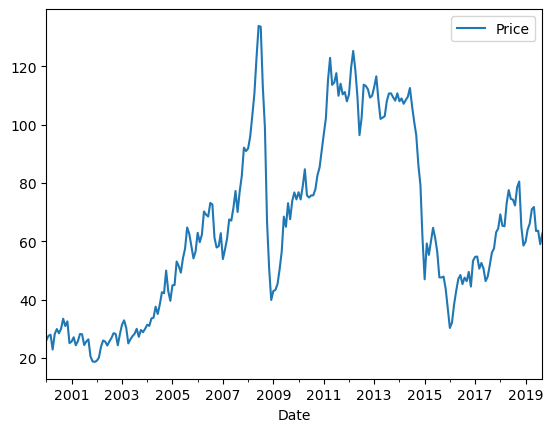

In [145]:
brent.resample('M').median().plot()

In [146]:
import seaborn as sns
sns.set()

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\2899938864.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  brent.resample('M').mean().plot()


<Axes: xlabel='Date'>

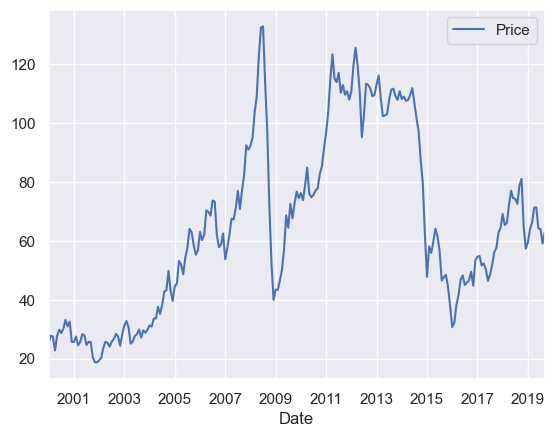

In [147]:
brent.resample('M').mean().plot()

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\1261264491.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  brent.resample('Y').mean().plot()


<Axes: xlabel='Date'>

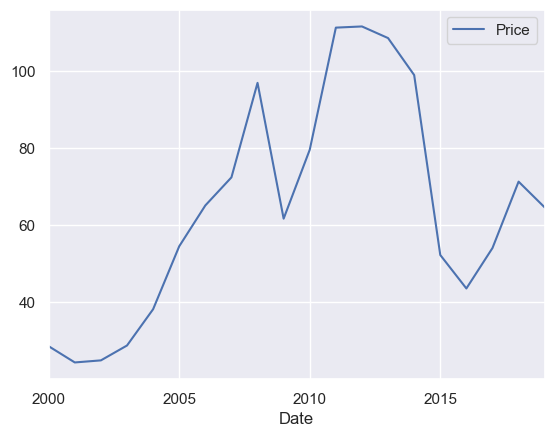

In [148]:
brent.resample('Y').mean().plot()

<Axes: xlabel='Date'>

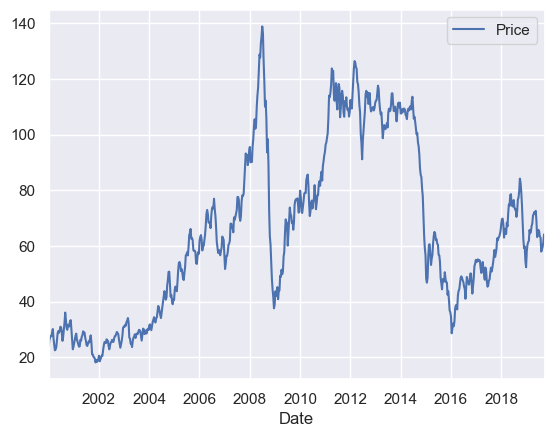

In [149]:
brent.resample('10D').mean().plot()

# UPsampling and interpolation

In [150]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [151]:
brent.resample('8H').mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\4253365148.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  brent.resample('8H').mean()


,Price
Date,
2000-01-04 00:00:00,23.95
2000-01-04 08:00:00,NaN
2000-01-04 16:00:00,NaN
2000-01-05 00:00:00,23.72
2000-01-05 08:00:00,NaN
...,...
2019-09-28 16:00:00,NaN
2019-09-29 00:00:00,NaN
2019-09-29 08:00:00,NaN


In [152]:
# linear interpolation

In [153]:
# ==ASIDE==

In [154]:
# 23.95 NA NA 23.72

In [155]:
diff = (23.72 - 23.95) / 3

In [156]:
N1 = 23.95 + diff

In [157]:
N1

23.87333333333333

In [158]:
N2 = N1 + diff

In [159]:
N2

23.796666666666663

In [160]:
N2 + diff

23.719999999999995

In [161]:
# ===END==

In [162]:
brent.resample('8H').interpolate(method='linear')

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\1275474036.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  brent.resample('8H').interpolate(method='linear')


,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.873333
2000-01-04 16:00:00,23.796667
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.663333
...,...
2019-09-28 16:00:00,61.652222
2019-09-29 00:00:00,61.486667
2019-09-29 08:00:00,61.321111


In [163]:
brent.resample('8H').interpolate(method='spline', order = 3)

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\587548666.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  brent.resample('8H').interpolate(method='spline', order = 3)


,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.013531
2000-01-04 16:00:00,23.117453
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.319619
...,...
2019-09-28 16:00:00,61.240570
2019-09-29 00:00:00,61.195778
2019-09-29 08:00:00,61.176797


# What about asfreq()

In [164]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [165]:
# downsample: many --> few (aggregation)
# upsample: few --> many (interpolation)

In [166]:
brent.asfreq('10D', method='ffill')

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
2000-02-03,27.60
2000-02-13,27.82
...,...
2019-08-12,57.13
2019-08-22,59.81
2019-09-01,61.04


In [167]:
'2000-02-13' in brent.index

False

In [168]:
pd.Timestamp('2000-02-13').day_name()

'Sunday'

In [169]:
brent.loc['2000-02-11']

Price    27.82
Name: 2000-02-11 00:00:00, dtype: float64

In [170]:
brent.asfreq('10D', fill_value = 12) 

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
2000-02-03,27.60
2000-02-13,12.00
...,...
2019-08-12,57.13
2019-08-22,59.81
2019-09-01,12.00


In [171]:
brent.asfreq('10D', fill_value = brent.values.mean()) 

,Price
Date,
2000-01-04,23.950000
2000-01-14,25.500000
2000-01-24,27.020000
2000-02-03,27.600000
2000-02-13,64.358078
...,...
2019-08-12,57.130000
2019-08-22,59.810000
2019-09-01,64.358078


In [172]:
brent.asfreq('M', method='ffill')

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\2662937950.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  brent.asfreq('M', method='ffill')


,Price
Date,
2000-01-31,27.08
2000-02-29,29.01
2000-03-31,23.98
2000-04-30,23.79
2000-05-31,29.64
...,...
2019-05-31,66.78
2019-06-30,67.52
2019-07-31,64.07


In [173]:
brent.resample('M')

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\2502958358.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  brent.resample('M')


In [174]:
brent.resample('M').median()

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\2647609831.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  brent.resample('M').median()


,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


In [175]:
brent.asfreq('M', method='ffill').median()

C:\Users\hp\AppData\Local\Temp\ipykernel_135340\3719901335.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  brent.asfreq('M', method='ffill').median()


Price    61.35
dtype: float64

# BONUS - Rolling Windows

In [179]:
brent.head()

,Price,Quarter
Date,,
2000-01-04,23.95,1
2000-01-05,23.72,1
2000-01-06,23.55,1
2000-01-07,23.35,1
2000-01-10,22.77,1


In [181]:
# window size : 3
# aggfunc: mean()

In [185]:
(brent.iloc[0] + brent.iloc[1] + brent.iloc[2]) / 3  # 1st in the window

Price      23.74
Quarter     1.00
dtype: float64

In [186]:
(brent.iloc[1] + brent.iloc[2] + brent.iloc[3]) / 3  # 2nd in the window

Price      23.54
Quarter     1.00
dtype: float64

In [187]:
brent.rolling(3).mean()

,Price,Quarter
Date,,
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,23.740000,1.0
2000-01-07,23.540000,1.0
2000-01-10,23.223333,1.0
...,...,...
2019-09-24,64.673333,3.0
2019-09-25,63.733333,3.0
2019-09-26,62.873333,3.0


In [188]:
brent.rolling(10).mean()

,Price,Quarter
Date,,
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-10,NaN,NaN
...,...,...
2019-09-24,64.160,3.0
2019-09-25,64.099,3.0
2019-09-26,64.231,3.0


In [189]:
# visualizing moving averages

Text(0, 0.5, 'Brent price(USD)')

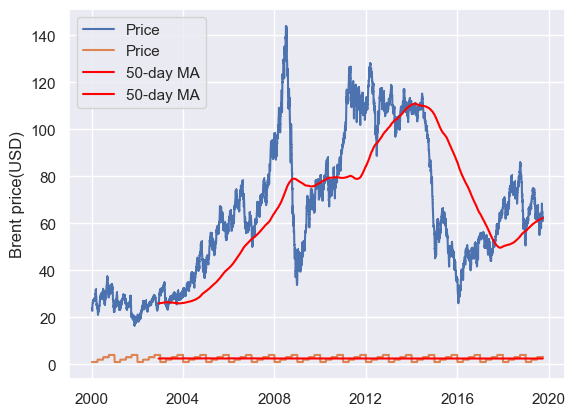

In [200]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(brent, marker=',', label = 'Price')
ax.plot(brent.rolling(750).mean(), color='red', label='50-day MA')

ax.legend();
ax.set_ylabel('Brent price(USD)')

# Skill challenge

In [176]:
# add a new column( called quarter)  to the brent dataframe that contains each dates respective calendar quarter. e.g. 
# 2000-01-04 would be quarter 1

brent['Quarter'] = brent.index.quarter

In [177]:
# using the new quarter column and the groupby() method, calculate the avergae price and standard deviation for each quarter
# of the year 2014

brent[brent.index.year == 2014].groupby('Quarter').agg(average_price = ('Price','mean'), std_price = ('Price', 'std'))

,average_price,std_price
Quarter,,
1,108.141935,1.280641
2,109.694063,2.406442
3,101.899844,4.364868
4,76.429219,11.410171
